# TMF AIVA Hackathon User Guide

## Tl'dr



> Sample .env

```shell
# .env
PROJECT_ID="enterprise-search-gen-ai"
PROJECT_ID_INT="982845833565"
LOCATION="global"
AGENT_LOCATION="us-central1"
STAGING_BUCKET="gs://agent-test-srini"
DATA_STORE_ID_PDF="tmf-metadata-layout-p_1715009821486"
DATA_STORE_ID_WEB="tmf-public_1692445422672"
REASONING_ENGINE_ID="6866054291275120640"
TOKEN="token-goes-here"
```


```shell
source .env
python call_tmf_aiva.py
```

## Dependencies


```bash
pip install ratelimiter
```

## Environment Variables


```python
 import os
 from dotenv import load_dotenv, find_dotenv

_=load_dotenv(find_dotenv())

PROJECT_ID = os.getenv('PROJECT_ID_INT')
LOCATION = os.getenv('AGENT_LOCATION')
REASONING_ENGINE_ID = os.getenv('REASONING_ENGINE_ID')
```

## Schemas

> Input Schema
```json
{
    "input": {
      "input": "Describe ODA Canvas?"
    }
}
```

> Output Schema - WIP
```json
{
    "output": {
        "input": "Describe ODA Canvas?",
        "output": "The ODA Canvas is a runtime ..",
        "intermediate_steps": [
            [
                {
                    "type": "constructor",
                    "kwargs": {},
                    "id": [],
                    "lc": 1
                },
                [
                    // pdf search response
                    {
                        "answer": {
                            "steps": [],
                            "relatedQuestions": [],
                            "state": "SUCCEEDED",
                            "references": [],
                            "name": "projects/...",
                            "answerText": "TM Forum and MEF APIs are not directly..",
                            "citations": [{"sources": [{"referenceId": "3"}], "endIndex": "118"},{...}, ...]
                        }
                    },
                    // web search response
                    {
                        "answer": {
                            "state": "SUCCEEDED",
                            "name": "projects/982845833565/...",
                            "relatedQuestions": [],
                            "answerText": ""## ODF: A Comprehensive Framework for Digital ...",
                            "references": [],
                            "steps": [],
                            "citations": [{"sources": [{"referenceId": "3"}], "endIndex": "118"},{...}, ...]
                        }
                    },
                    // image search response
                    {
                        "attributionToken": ""ngHwnQoLCLXL-...",
                        "results": [],
                        "totalSize": 1,
                        "summary": {}
                    }
                ]
            ]
        ]
    }
}
```

> Output schema structure

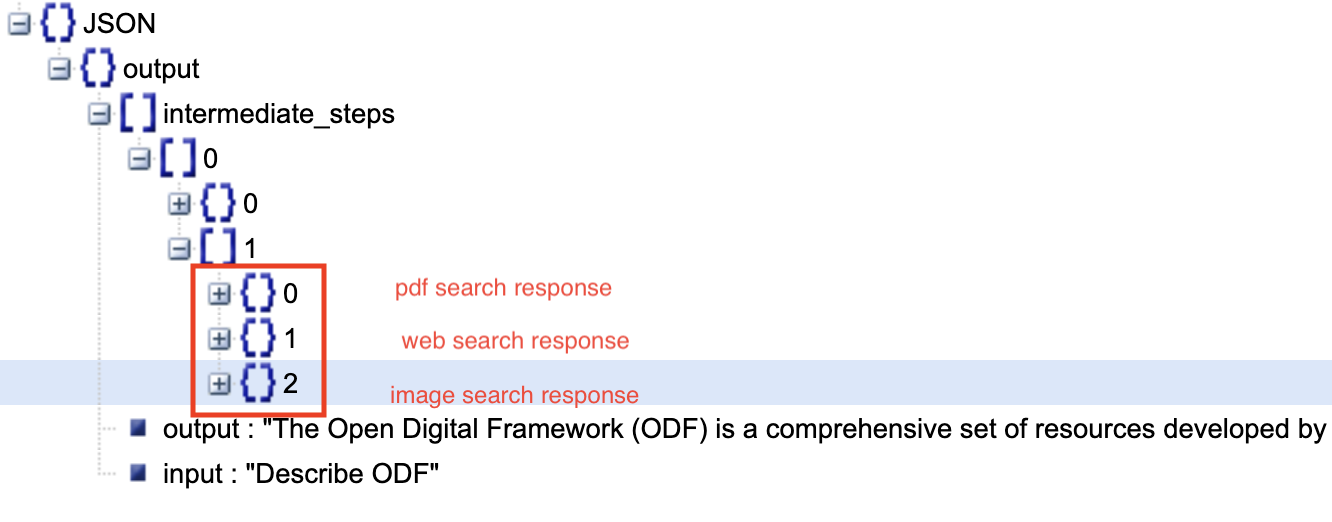

> Output schema json - zooming on only pdf search response

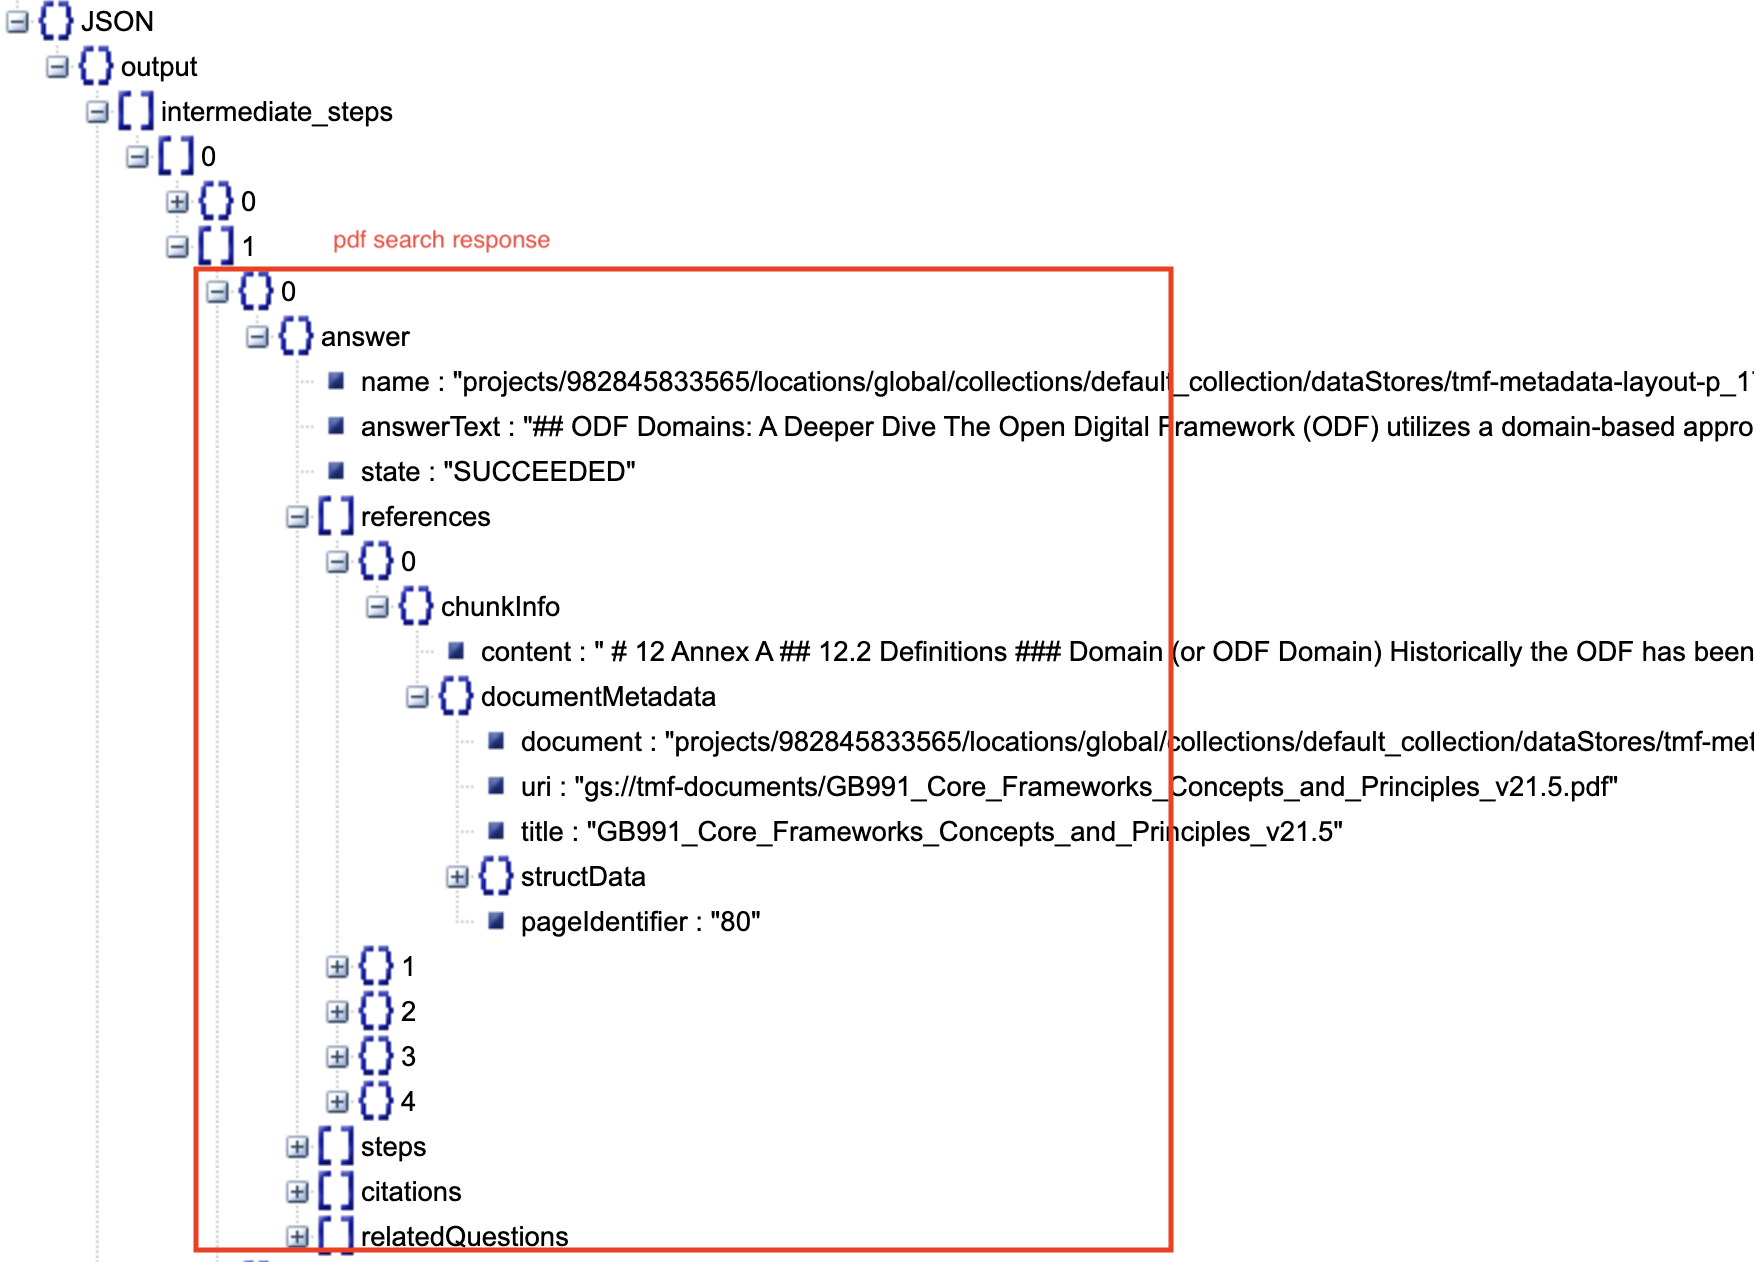

> Output schema json zooming into web search response

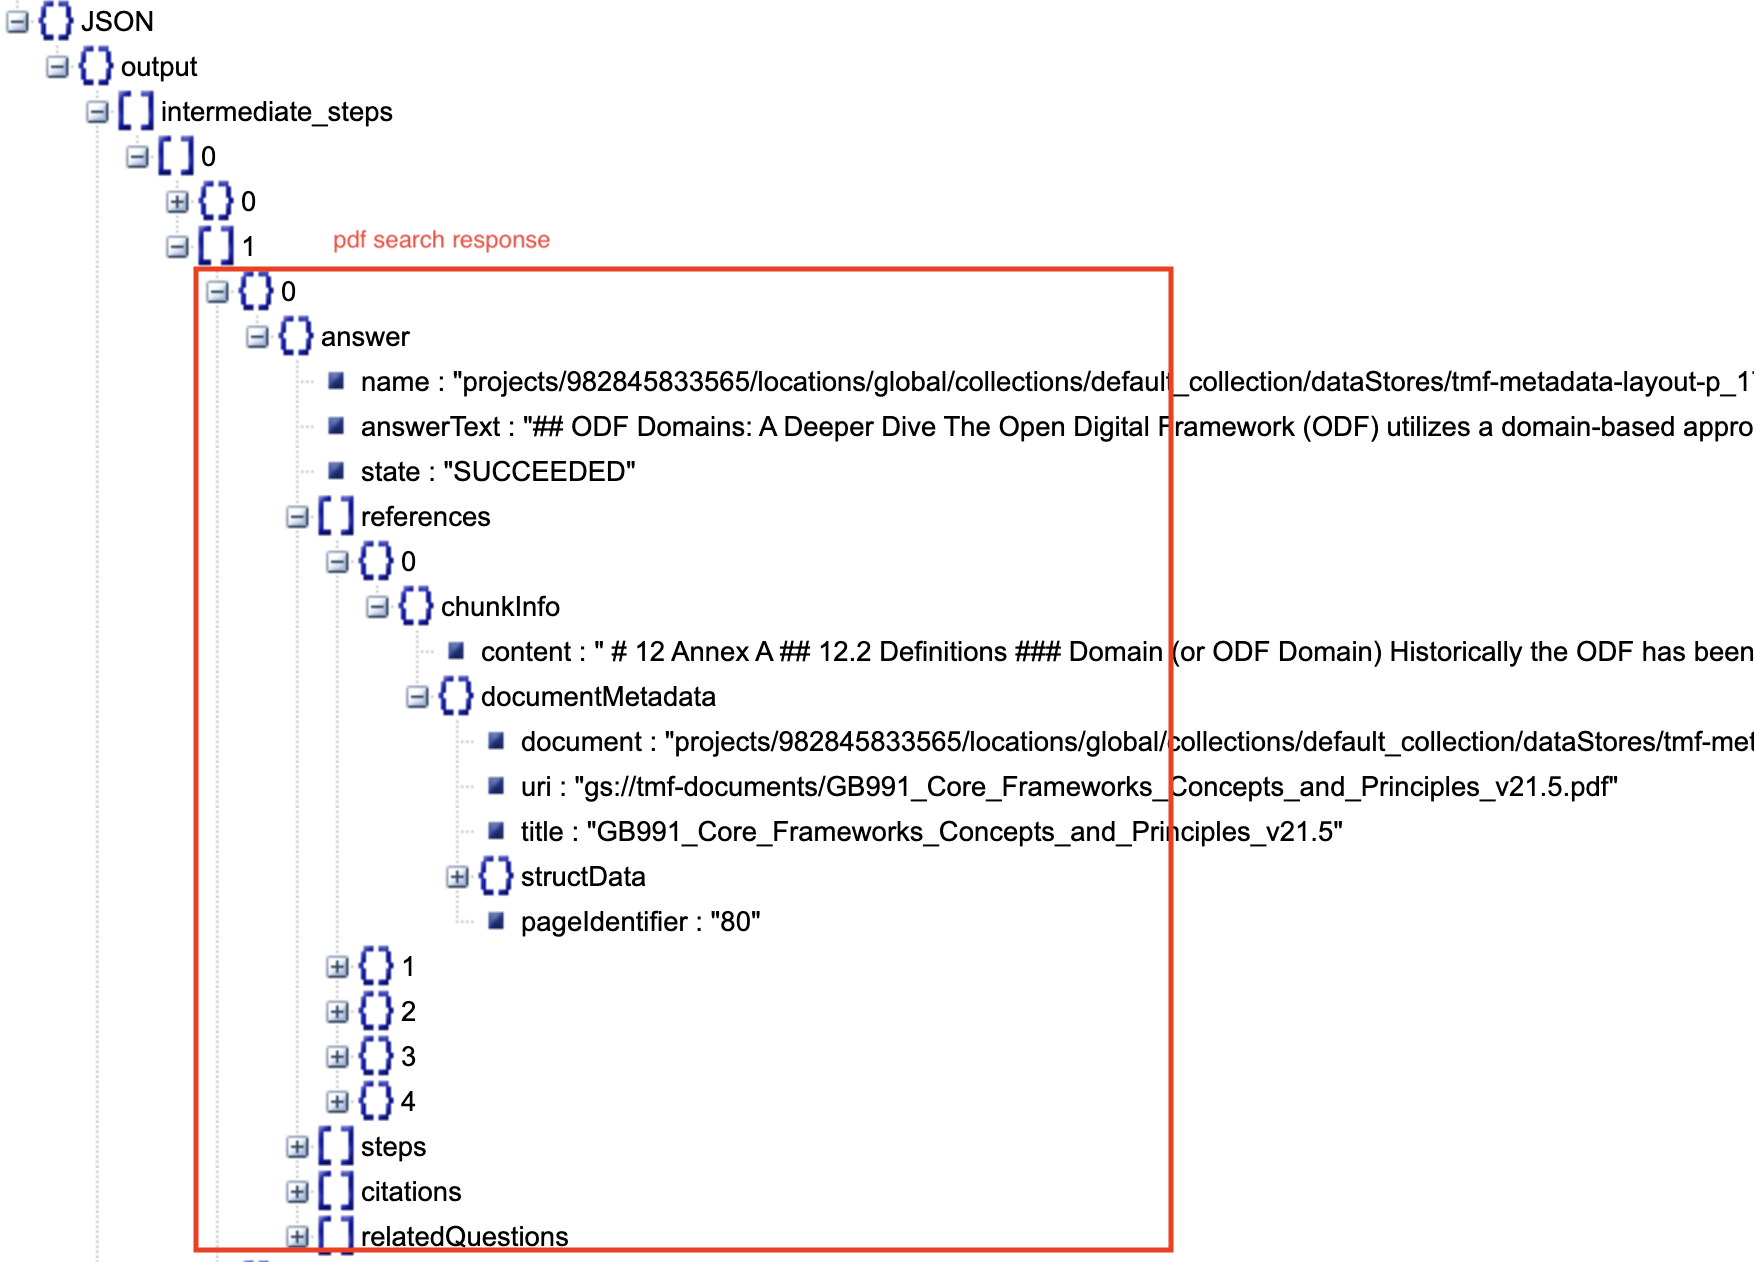

> Output schema json - zooming into image search response

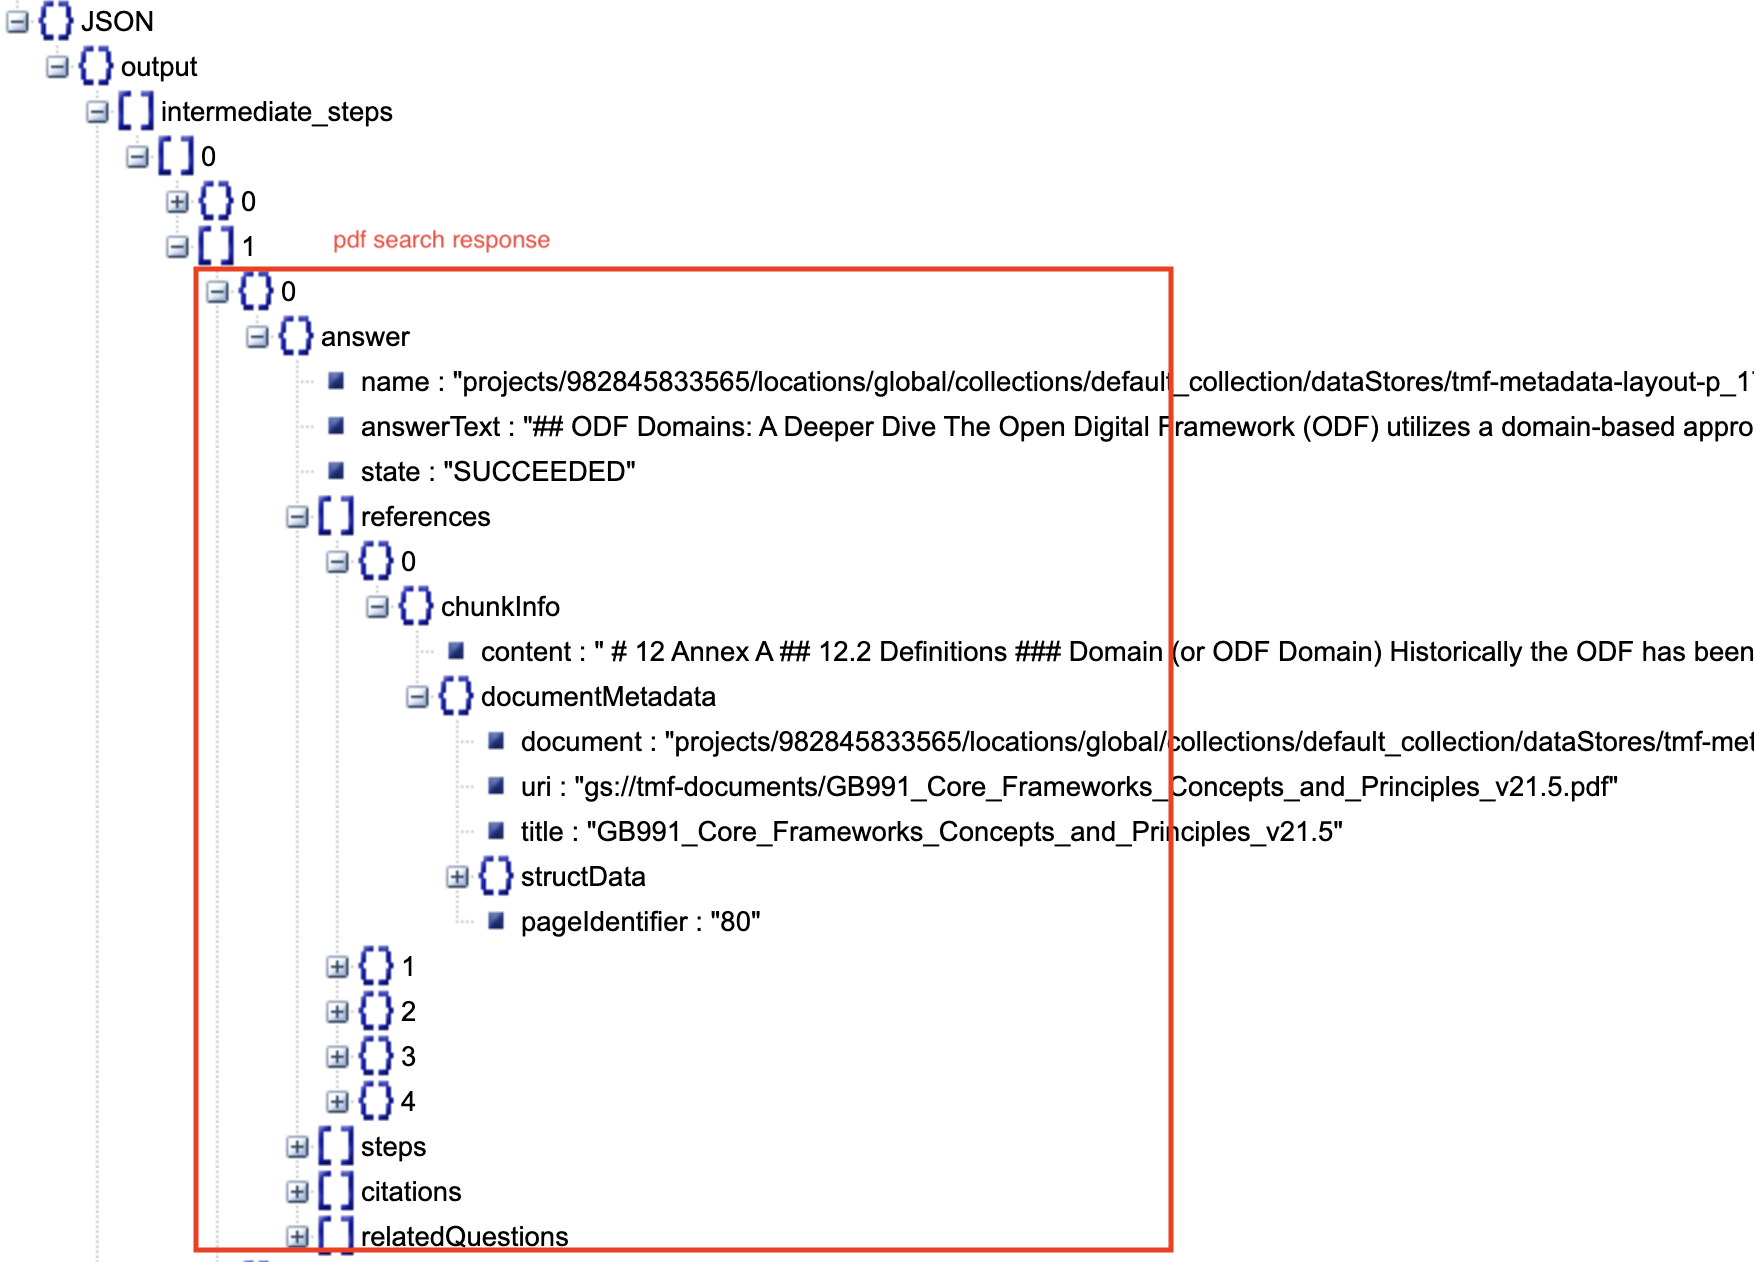

> Output schema json - focusing on code gen response

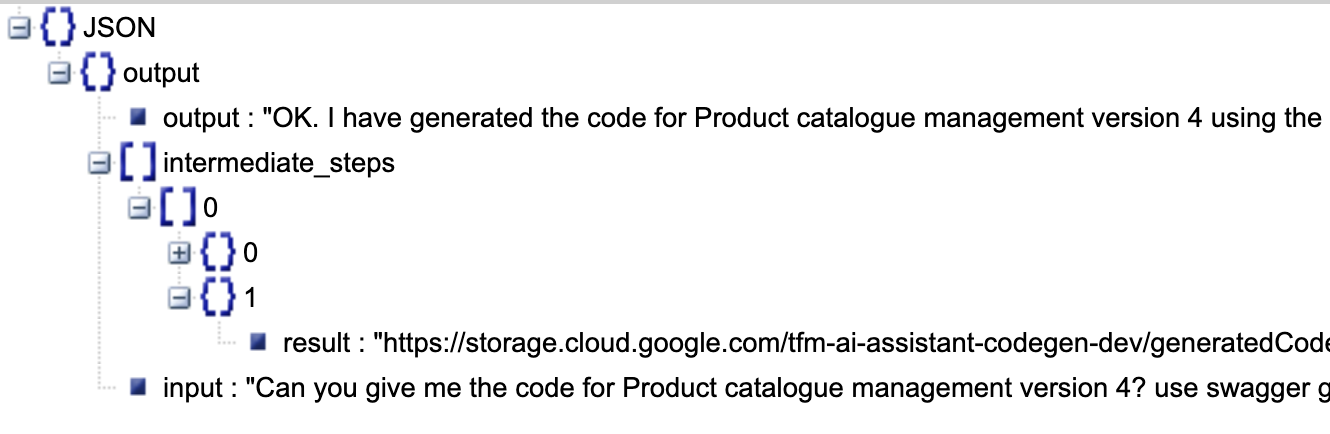

## Curl client

```python
import google.auth
import json
import requests

def call_tmf_aiva_agent(query_str, token):
  """Makes a POST request to the specified Reasoning Engine endpoint."""
  # Set the headers and data
  headers = {
    "Authorization": f"Bearer {token}",
    "Content-Type": "application/json; charset=utf-8",
  }

  # Create the JSON payload from the query_str
  json_input = {"input": {"input": f"{query_str}"}}

  # Construct the URL
  url = f"https://{LOCATION}-aiplatform.googleapis.com/v1beta1/projects/{PROJECT_ID}/locations/us-central1/reasoningEngines/{REASONING_ENGINE_ID}:query"

  # Send the POST request
  r = requests.post(url, headers=headers, data=json.dumps(json_input))
  return r.json()
  
## Generate user default auth token
credentials, _ = google.auth.default()
request = google.auth.transport.requests.Request()
credentials.refresh(request)
token = credentials.token
  
agent_response = call_tmf_aiva_agent("Are TM Forum and MEF APIs the same?", token)
```

## Complete python client code

```python
import os
import google.auth
import json
import requests
from dotenv import load_dotenv, find_dotenv

# load environment variables
_=load_dotenv(find_dotenv())

# read environment variables
PROJECT_ID = os.getenv('PROJECT_ID_INT')
LOCATION = os.getenv('AGENT_LOCATION')
REASONING_ENGINE_ID = os.getenv('REASONING_ENGINE_ID')

# agent client code
def call_tmf_aiva_agent(query_str, token):
  """Makes a POST request to the specified Reasoning Engine endpoint."""
  # Set the headers and data
  headers = {
    "Authorization": f"Bearer {token}",
    "Content-Type": "application/json; charset=utf-8",
  }

  # Create the JSON payload from the query_str
  json_input = {"input": {"input": f"{query_str}"}}

  # Construct the URL
  url = f"https://{LOCATION}-aiplatform.googleapis.com/v1beta1/projects/{PROJECT_ID}/locations/{LOCATION}/reasoningEngines/{REASONING_ENGINE_ID}:query"

  # Send the POST request
  r = requests.post(url, headers=headers, data=json.dumps(json_input))
  return r.json()

## Generate user default auth token
credentials, _ = google.auth.default()
request = google.auth.transport.requests.Request()
credentials.refresh(request)
token = credentials.token

query = "Describe ODF?"

agent_response = call_tmf_aiva_agent(query, token)

print(agent_response)
```

> Sample Agent response

> reasoning_agent_search_response.json - typical response for a search query

> reasoning_agent_code_gen_response.json - typical response for a code gen query

